<a href="https://colab.research.google.com/github/thiagocdn/Imersao-dados-Alura/blob/main/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mega desafio 01: Pegar amostra completa dos alunos de 13 e 14 anos
# Desafio feito na maquina local com os dados completos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [ ]:
# Desafio 02: aumentar a amostra para alunos menor de idade e comparar a proporcao por estado
dados[dados["NU_IDADE"] < 18]["SG_UF_RESIDENCIA"].value_counts(normalize=True)

SP    0.234347
MG    0.100704
BA    0.063796
CE    0.062516
PE    0.057778
PR    0.056466
RJ    0.052849
PA    0.040589
GO    0.038380
MA    0.037260
RS    0.031690
PB    0.026825
SC    0.025448
PI    0.021703
MT    0.019590
ES    0.016549
DF    0.015109
AL    0.014277
RN    0.013732
AM    0.013700
MS    0.013476
SE    0.012964
TO    0.011012
RO    0.007490
AP    0.006018
AC    0.003489
RR    0.002241
Name: SG_UF_RESIDENCIA, dtype: float64

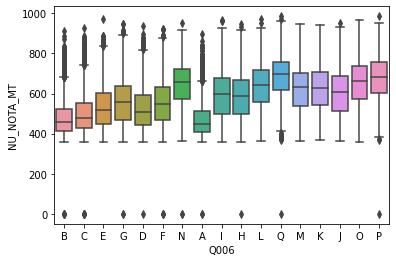

In [ ]:
sns.boxplot(x="Q006", y="NU_NOTA_MT", data=dados)

Text(0.5, 1.0, 'Boxplot das Notas de Matematica pela Renda')

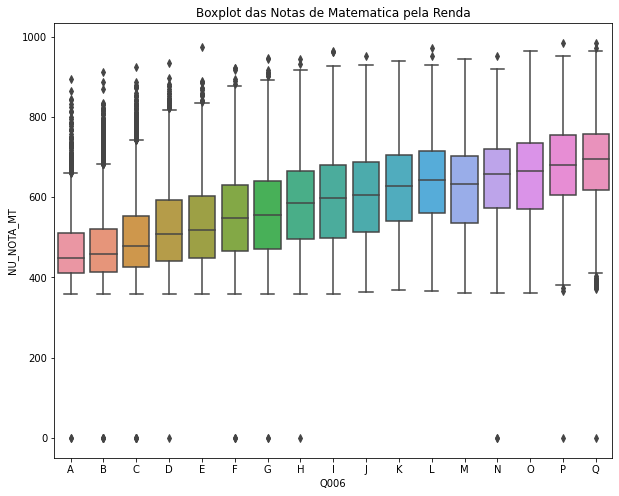

In [ ]:
plt.figure(figsize=(10, 8))
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
sns.boxplot(x="Q006", y="NU_NOTA_MT", data=dados, order=renda_ordenada)
plt.title("Boxplot das Notas de Matematica pela Renda")

In [ ]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das Nota Total pela Renda')

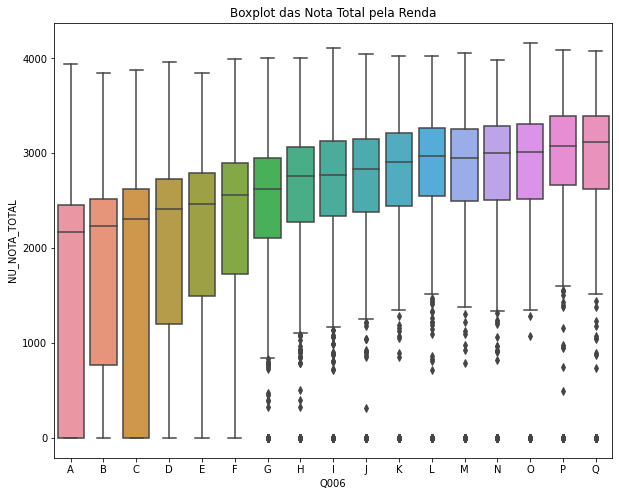

In [ ]:
plt.figure(figsize=(10, 8))
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados, order=renda_ordenada)
plt.title("Boxplot das Nota Total pela Renda")

In [ ]:
# DESAFIO 03: Criar uma funcao para plotar o boxplot do seaborn
def Boxplot(x, y, data, order=True, hue=None):
  plt.figure(figsize=(10, 8))
  if(order==True):
    renda_ordenada = data[x].unique()
    renda_ordenada.sort()
  else:
    renda_ordenada = data[x].unique()
  sns.boxplot(x=x, y=y, data=data, order=renda_ordenada, hue=hue)
  plt.title("Boxplot das " + x + " pela " + y)

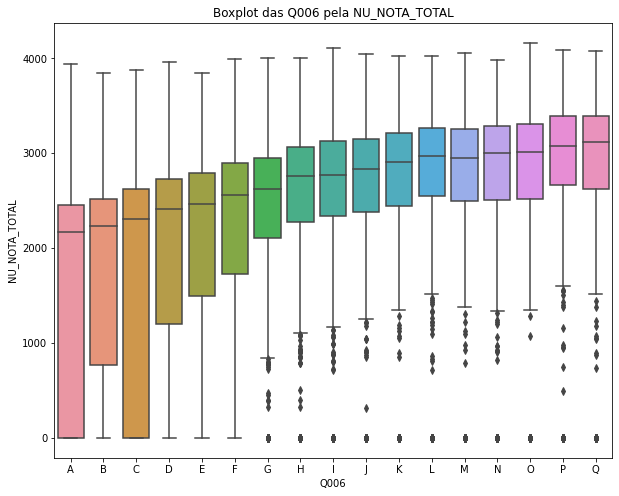

In [ ]:
Boxplot("Q006", "NU_NOTA_TOTAL", dados, order=True)

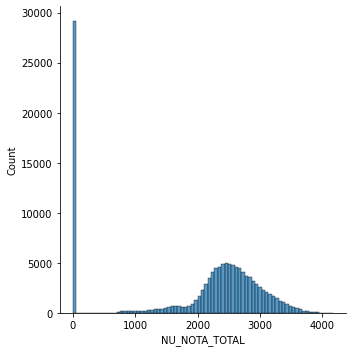

In [ ]:
sns.displot(dados, x="NU_NOTA_TOTAL")

In [ ]:
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
# DESAFIO 04: Verificar se quem zerou a prova foi eliminado ou nao estava presente
presenca = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT"]
dados[presenca].query("NU_NOTA_CN == 0 and NU_NOTA_CH == 0 and NU_NOTA_MT == 0 and NU_NOTA_LC == 0 and NU_NOTA_REDACAO == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
8693,0.0,0.0,0.0,0.0,0.0,1,1,1,1
101269,0.0,0.0,0.0,0.0,0.0,1,1,1,1


In [ ]:
respostas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT"]
dados[respostas].query("NU_NOTA_CN == 0 and NU_NOTA_CH == 0 and NU_NOTA_MT == 0 and NU_NOTA_LC == 0 and NU_NOTA_REDACAO == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
8693,0.0,0.0,0.0,0.0,0.0,.............................................,.............................................,99999............................................,.............................................
101269,0.0,0.0,0.0,0.0,0.0,.............................................,.............................................,99999............................................,.............................................


In [ ]:
# DESAFIO 05: Entender se quem eh eliminado recebe um NaN ou "0"
dados[presenca].query("TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2")
# Quem eh eliminado, fica com a nota NaN

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
77,NaN,NaN,NaN,NaN,NaN,0,2,2,0
396,NaN,NaN,NaN,NaN,NaN,0,2,2,0
446,NaN,NaN,NaN,NaN,NaN,0,2,2,0
609,NaN,NaN,NaN,NaN,NaN,0,2,2,0
728,NaN,NaN,NaN,NaN,NaN,0,2,2,0
...,...,...,...,...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN,0,2,2,0
125503,NaN,472.4,NaN,476.8,520.0,2,1,1,2
125784,NaN,NaN,NaN,NaN,NaN,0,2,2,0
126769,NaN,NaN,NaN,NaN,NaN,0,2,2,0


In [ ]:
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot das Nota Total pela Renda')

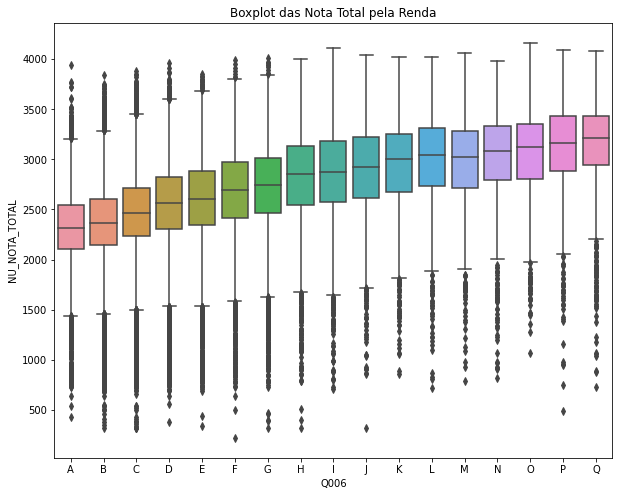

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_sem_nota_zero, order=renda_ordenada)
plt.title("Boxplot das Nota Total pela Renda")

Text(0.5, 1.0, 'Boxplot das Nota Total pela Renda')

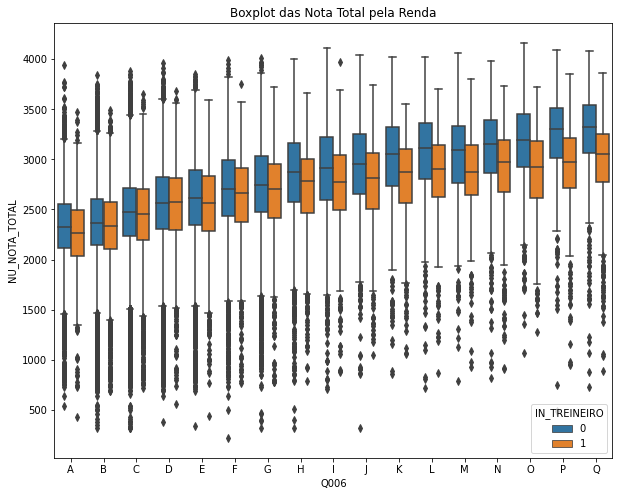

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_sem_nota_zero, hue="IN_TREINEIRO", order=renda_ordenada)
plt.title("Boxplot das Nota Total pela Renda")

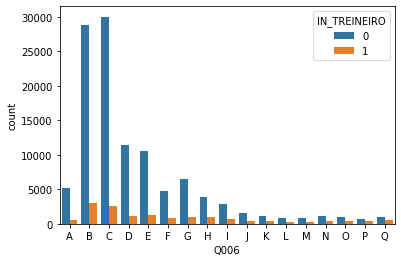

In [ ]:
# DESAFIO 06: Verificar a proporcao dos participantes de rendas mais altas e mais baixas como treineiros e nao-treineiros
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()
sns.countplot(data=dados, x="Q006", hue="IN_TREINEIRO", order=renda_ordenada)

A    0.113654
B    0.105239
C    0.085490
D    0.105583
E    0.119573
F    0.178683
G    0.163369
H    0.250584
I    0.251145
J    0.289312
K    0.300000
L    0.385194
M    0.397436
N    0.397448
O    0.414712
P    0.505319
Q    0.567686
Name: Q006, dtype: float64


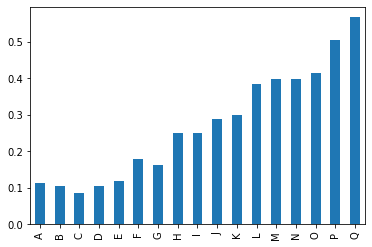

In [ ]:
proporcao_renda_treineiro = (dados.query("IN_TREINEIRO == 1")["Q006"].value_counts() / dados.query("IN_TREINEIRO == 0")["Q006"].value_counts())
proporcao_renda_treineiro.plot(kind="bar")
print(proporcao_renda_treineiro)

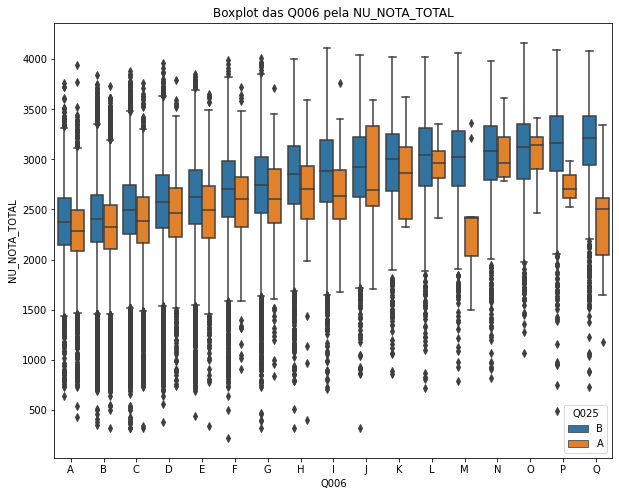

In [ ]:
# DESAFIO 07: Fazer o mesmo boxplot olhando para a questao 25 (tem internet ou nao) e fazer uma reflexao sobre o assunto no contexto da pandemia
Boxplot("Q006", "NU_NOTA_TOTAL", dados_sem_nota_zero, order=True, hue="Q025")